<a href="https://www.kaggle.com/code/nitishmamadgi/credit-card-fraud-5-ml-models?scriptVersionId=155039795" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Credit Card Fraud Detection Project

## Introduction
Welcome to the Credit Card Fraud Detection Project! In this project, our objective is to build a model that can accurately detect fraudulent credit card transactions. Detecting fraudulent transactions is essential to prevent customers from being charged for items they did not purchase and to protect credit card companies from financial losses.

## Dataset Overview
The dataset contains credit card transactions made by European cardholders in September 2013. It comprises two days' worth of transactions, totaling 284,807 entries. Out of these transactions, only 492 are fraudulent, making the dataset highly unbalanced. The positive class (frauds) represents only 0.172% of all transactions.

The dataset provides numerical input variables obtained through PCA transformation. The features V1 to V28 are principal components, while 'Time' and 'Amount' are the only features not transformed. 'Time' represents the seconds elapsed between each transaction and the first transaction in the dataset, and 'Amount' represents the transaction amount.

## Objective
The main objective of this project is to develop a machine learning model capable of accurately detecting credit card frauds. Due to the highly imbalanced dataset, we will focus on performance metrics such as the Area under the Receiver Operating Characteristic Curve (AUC-ROC) rather than traditional confusion matrix accuracy. Our goal is to optimize the model to achieve high precision and recall for fraud detection.

<!-- You can continue adding more sections as needed -->


### Models Used 
Logistic Regression, Decision Tree Classifier, RandomForestClassifier, SVC, KNeighboursClassifier

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


- We will sample the majority class to have only 3000 datapoints so that it is comparable to the minority class. 
- Since our models do not need too much data to train we can reduce the datapoints without much loss of information.

In [2]:
df_input = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
legit = df_input[df_input['Class'] == 0].sample(n=3000, random_state =42)
fraud = df_input[df_input['Class'] == 1]

In [3]:
df = pd.concat([legit, fraud], ignore_index=True)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,82450.00,1.31,0.59,-0.67,0.72,0.30,-1.13,0.39,-0.29,-0.13,...,-0.17,-0.43,-0.14,-0.20,0.64,0.40,-0.03,0.03,0.76,0
1,50554.00,-0.80,1.19,0.90,0.69,0.22,-0.32,0.50,0.14,-0.76,...,0.20,0.58,-0.09,0.01,-0.25,-0.38,-0.40,-0.11,4.18,0
2,55125.00,-0.39,-0.25,1.12,-1.31,-0.64,0.01,-0.70,-0.03,-2.63,...,-0.13,0.12,-0.19,-0.49,-0.31,0.01,0.16,0.24,15.00,0
3,116572.00,-0.06,1.07,-0.99,-0.03,0.18,-1.35,0.78,0.13,-0.15,...,0.36,0.91,-0.02,-0.13,-0.34,-0.15,-0.02,0.04,57.00,0
4,90434.00,1.85,0.37,0.27,3.87,0.09,0.97,-0.72,0.24,0.68,...,0.10,0.62,0.20,0.69,-0.21,-0.02,-0.02,-0.04,0.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3492 non-null   float64
 1   V1      3492 non-null   float64
 2   V2      3492 non-null   float64
 3   V3      3492 non-null   float64
 4   V4      3492 non-null   float64
 5   V5      3492 non-null   float64
 6   V6      3492 non-null   float64
 7   V7      3492 non-null   float64
 8   V8      3492 non-null   float64
 9   V9      3492 non-null   float64
 10  V10     3492 non-null   float64
 11  V11     3492 non-null   float64
 12  V12     3492 non-null   float64
 13  V13     3492 non-null   float64
 14  V14     3492 non-null   float64
 15  V15     3492 non-null   float64
 16  V16     3492 non-null   float64
 17  V17     3492 non-null   float64
 18  V18     3492 non-null   float64
 19  V19     3492 non-null   float64
 20  V20     3492 non-null   float64
 21  V21     3492 non-null   float64
 22  

In [6]:
df.duplicated().sum()

19

In [7]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,82450.00,1.31,0.59,-0.67,0.72,0.30,-1.13,0.39,-0.29,-0.13,...,-0.17,-0.43,-0.14,-0.20,0.64,0.40,-0.03,0.03,0.76,0
1,50554.00,-0.80,1.19,0.90,0.69,0.22,-0.32,0.50,0.14,-0.76,...,0.20,0.58,-0.09,0.01,-0.25,-0.38,-0.40,-0.11,4.18,0
2,55125.00,-0.39,-0.25,1.12,-1.31,-0.64,0.01,-0.70,-0.03,-2.63,...,-0.13,0.12,-0.19,-0.49,-0.31,0.01,0.16,0.24,15.00,0
3,116572.00,-0.06,1.07,-0.99,-0.03,0.18,-1.35,0.78,0.13,-0.15,...,0.36,0.91,-0.02,-0.13,-0.34,-0.15,-0.02,0.04,57.00,0
4,90434.00,1.85,0.37,0.27,3.87,0.09,0.97,-0.72,0.24,0.68,...,0.10,0.62,0.20,0.69,-0.21,-0.02,-0.02,-0.04,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,169142.00,-1.93,1.13,-4.52,1.75,-1.57,-2.01,-0.88,0.70,-2.06,...,0.78,-0.32,0.64,-0.29,0.54,0.79,0.29,0.15,390.00,1
3488,169347.00,1.38,1.29,-5.00,1.41,0.44,-1.33,-1.41,0.25,-1.13,...,0.37,0.03,-0.15,-0.08,0.52,0.74,0.39,0.19,0.76,1
3489,169351.00,-0.68,1.13,-2.21,0.47,-1.12,-0.00,-2.23,1.21,-0.65,...,0.75,0.83,0.19,0.03,-0.74,0.47,0.39,0.19,77.89,1
3490,169966.00,-3.11,0.59,-5.40,1.82,-0.84,-2.94,-2.21,1.06,-1.63,...,0.58,-0.27,-0.46,-0.18,-0.33,0.61,0.88,-0.25,245.00,1


In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## EDA 

**Question 1:** What is the distribution of fraudulent transactions (Class=1) compared to non-fraudulent transactions (Class=0)? How imbalanced is the dataset?

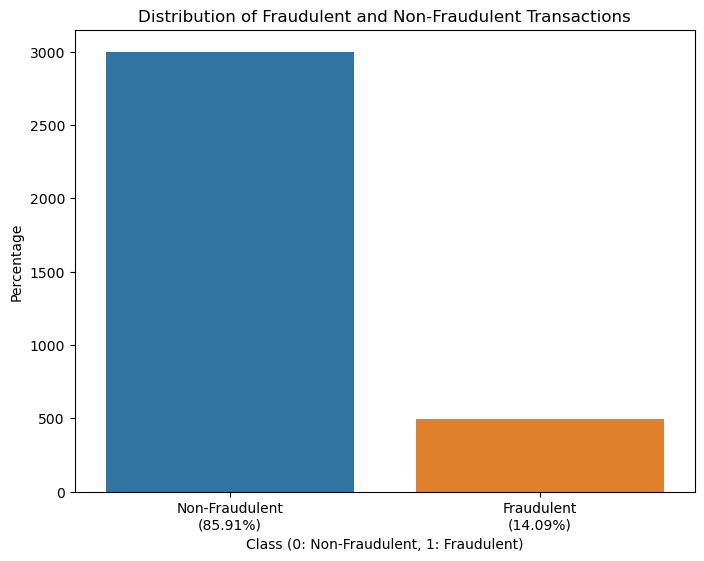

In [9]:
# Calculate the percentage of each class
fraudulent_percentage = (df['Class'].value_counts(normalize=True) * 100).loc[1]
non_fraudulent_percentage = (df['Class'].value_counts(normalize=True) * 100).loc[0]

# Plot the distribution of 'Class' using a countplot with percentages
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=[f'Non-Fraudulent\n({non_fraudulent_percentage:.2f}%)', f'Fraudulent\n({fraudulent_percentage:.2f}%)'])
plt.show()

**Question 2:** How does the transaction amount vary between fraudulent and non-fraudulent transactions?

In [10]:
transaction_amount_stats = df.groupby('Class')['Amount'].agg(['mean', 'median', 'min', 'max'])
transaction_amount_stats

,mean,median,min,max
Class,,,,
0,85.69,21.75,0.00,4000.00
1,122.21,9.25,0.00,2125.87


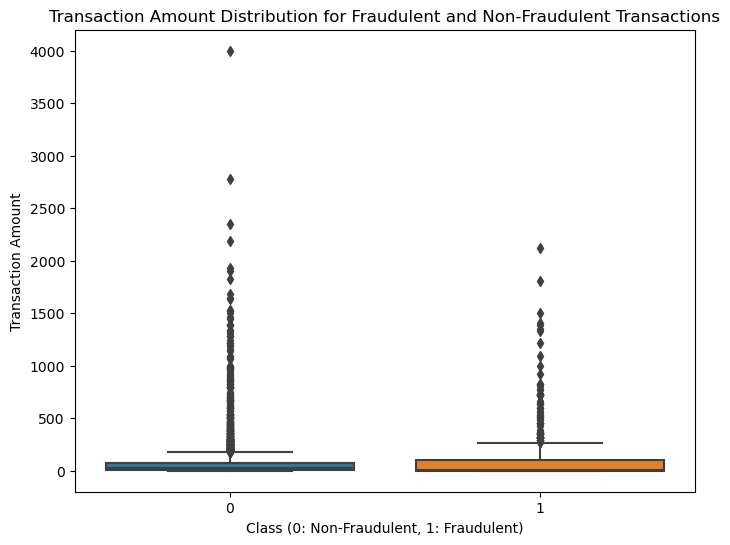

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount Distribution for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.show()

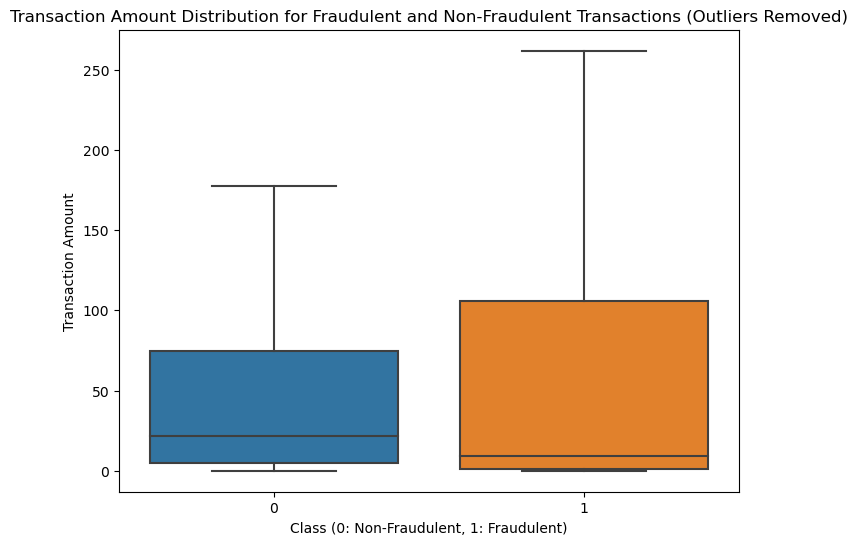

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False)
plt.title('Transaction Amount Distribution for Fraudulent and Non-Fraudulent Transactions (Outliers Removed)')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.show()

These statistics highlight that fraudulent transactions tend to have higher mean transaction amounts compared to non-fraudulent transactions.

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3492.00,3492.00,3492.00,3492.00,3492.00,3492.00,3492.00,3492.00,3492.00,3492.00,...,3492.00,3492.00,3492.00,3492.00,3492.00,3492.00,3492.00,3492.00,3492.00,3492.00
mean,92627.61,-0.69,0.49,-1.01,0.63,-0.39,-0.18,-0.79,0.09,-0.36,...,0.10,0.01,-0.01,-0.01,-0.01,0.00,0.02,0.01,90.84,0.14
std,47866.29,3.54,2.57,3.86,2.31,2.63,1.54,3.48,2.75,1.65,...,1.61,0.87,0.75,0.60,0.57,0.48,0.64,0.42,219.20,0.35
min,56.00,-30.55,-29.34,-31.10,-4.73,-22.11,-17.28,-43.56,-41.04,-13.43,...,-22.80,-8.89,-19.25,-2.84,-4.78,-1.28,-7.26,-4.59,0.00,0.00
25%,51405.75,-1.23,-0.49,-1.47,-0.73,-0.86,-0.89,-0.80,-0.21,-0.93,...,-0.21,-0.54,-0.18,-0.37,-0.33,-0.33,-0.07,-0.05,4.00,0.00
50%,83785.00,-0.23,0.20,-0.13,0.22,-0.07,-0.34,-0.05,0.06,-0.15,...,0.01,0.01,-0.02,0.03,0.02,-0.05,0.01,0.02,20.45,0.00
75%,137827.50,1.24,1.07,0.89,1.21,0.63,0.31,0.54,0.43,0.51,...,0.26,0.54,0.16,0.43,0.35,0.25,0.15,0.10,80.00,0.00
max,172619.00,2.37,22.06,3.77,12.11,28.52,8.76,8.21,20.01,6.47,...,27.20,8.36,8.07,2.97,2.74,2.86,4.36,15.37,4000.00,1.00


Are there any strong correlations between the PCA-transformed features and the "Class" column?

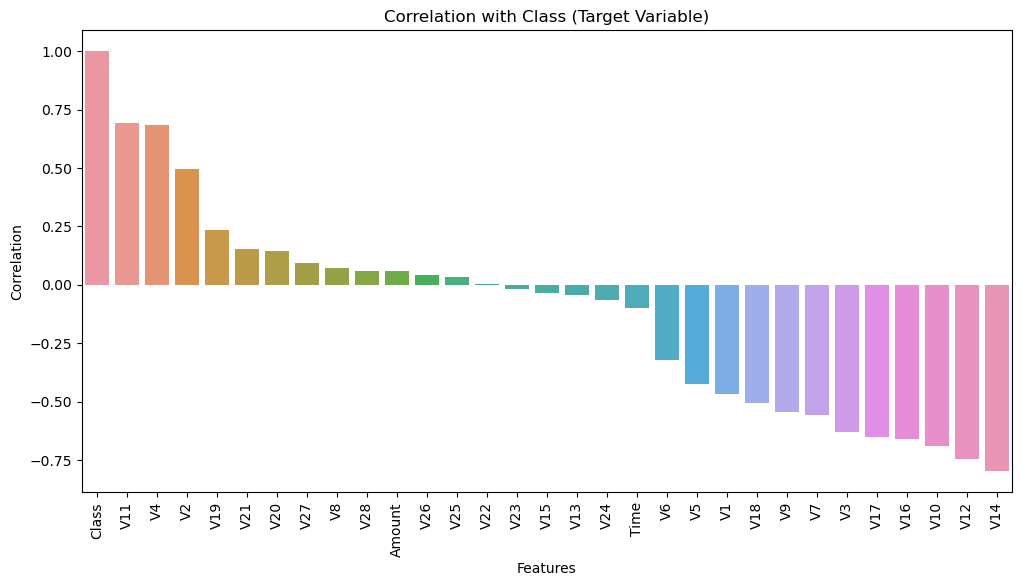

In [14]:
# Calculate the correlation between all columns and the 'Class' column
correlation_with_class = df.corr()['Class'].sort_values(ascending=False)

# Plot the correlation as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_class.index, y=correlation_with_class.values)
plt.xticks(rotation=90)
plt.title('Correlation with Class (Target Variable)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

**Positive Correlations:** Features **V11, V4, V2, and V21** have a mild positive correlation with the 'Class' column. This suggests that higher values of these features may be associated with a higher likelihood of fraudulent transactions.<br>

**Negative Correlations:** Features **V17, V14, V12, V10, V16, V3, V7, V18, etc** have notable negative correlations with the 'Class' column. This indicates that lower values of these features might be linked to fraudulent transactions.

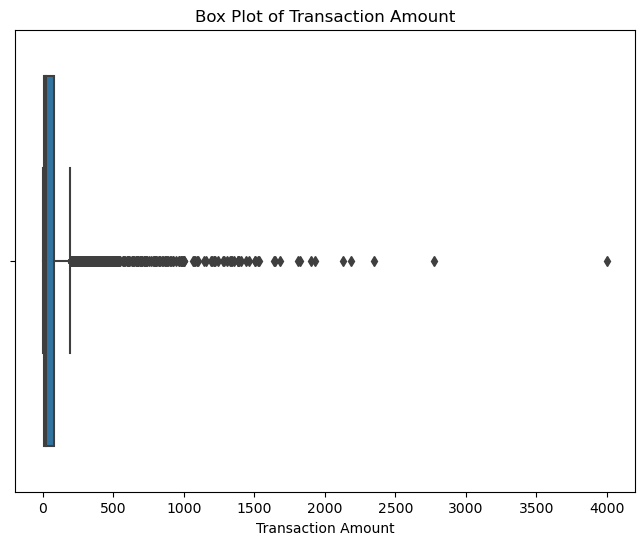

In [15]:
# Create a box plot for the 'Amount' feature
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amount', data=df, showfliers=True)
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()

In fraud detection projects, outliers may represent genuine high-value transactions or potential fraudulent activities. Removing them could lead to the loss of valuable information and might negatively impact the performance of the fraud detection model.<br>
Therefore, it is best to retain the outliers and consider appropriate techniques during the model building phase to handle the impact of outliers, if necessary.

## Data Preprocessing 

Using the correlation with "Class" Column that we did earlier , we will just consider the relevant features for furthur modelling. 

In [16]:
df1 = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,-0.67,0.72,0.39,-0.60,-0.33,-0.22,-1.05,0.60,0.63,0
1,0.90,0.69,0.50,0.17,0.82,0.47,0.57,-0.01,-0.50,0
2,1.12,-1.31,-0.70,2.05,0.58,-0.59,-0.34,-0.76,0.54,0
3,-0.99,-0.03,0.78,-1.24,-0.84,-0.59,-0.44,0.27,0.70,0
4,0.27,3.87,-0.72,1.17,1.30,-1.92,1.32,1.32,-0.44,0


In [17]:
X = df1.drop('Class', axis=1)
y = df1['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [18]:
y_train.value_counts()

0    2399
1     394
Name: Class, dtype: int64

In [19]:
y_test.value_counts()

0    601
1     98
Name: Class, dtype: int64

**Handling Imbalanced Data**<br>
The original dataset has a highly imbalanced class distribution, with approximately 99.83% of non-fraudulent transactions (Class=0) and only 0.17% of fraudulent transactions (Class=1).<br>
This severe class imbalance can lead to biased model performance, where the model may be highly accurate in predicting non-fraudulent transactions but struggle to detect fraudulent ones.<br>
To overcome this challenge we use Resampling Technique : a combination of Oversampling and Undersampling to balance the Class imbalance. 

In [20]:
import imblearn
from imblearn.over_sampling import SMOTE

In [21]:
over = SMOTE(sampling_strategy=0.5, random_state = 42)
X1_train,y1_train = over.fit_resample(X_train, y_train)

y1_train.value_counts()

0    2399
1    1199
Name: Class, dtype: int64

* For SMOTE, the sampling_strategy parameter represents the desired ratio of the number of samples in the minority class (fraudulent transactions, Class=1) over the number of samples in the majority class (non-fraudulent transactions, Class=0).<br>
* RandomUnderSampler, the sampling_strategy parameter represents the desired ratio of the number of samples in the majority class over the number of samples in the minority class.

## Modelling 

### Evaluation of Model
* It's essential to discuss how we will evaluate the model's performance, especially considering the imbalanced nature of the dataset.
* Using accuracy as the sole evaluation metric can be misleading due to the class imbalance.
* AUC-ROC is a metric that focuses on the precision-recall trade-off, which is essential in fraud detection
* The precision-recall curve is a graphical representation of the model's precision and recall trade-off across different classification thresholds. 
* AUC-ROC summarizes the precision-recall curve into a single value, providing an overall performance measure that considers both precision and recall.<br><br>

In the modeling phase of our credit card fraud detection project, we will build and evaluate several machine learning models to predict fraudulent transactions accurately. Our primary evaluation metric will be the Area under the Receiver Operating Characteristic Curve (AUC-ROC) since the dataset is highly imbalanced, and AUC-ROC provides a more meaningful measure of model performance for unbalanced classification.<br>
We will implement the following classification algorithms:
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* Support Vector Classifier (SVC)
* K-Nearest Neighbors (KNN) Classifier


Let's move on to writing the function for model fitting, which includes cross-validation and hyperparameter tuning. 

In [22]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

def fit_model(model, params, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    grid_search = GridSearchCV(model, param_grid=params, scoring='average_precision', cv=cv, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

Function for model evaluation : We will evaluate metrics such as AUC-ROC, accuracy, precision, recall, and F1 score to gain a comprehensive understanding of the model's performance.

In [23]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc,confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
     # AUROC Score
    auroc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUROC Score: {auroc:.4f}")
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # AUROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    # Display the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [25]:
logreg_params = {'C': [0.001, 0.01, 0.1, 1]}
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20]}
rf_params = {'n_estimators': [50, 100] , 'max_depth': [None, 10, 20]}
svc_params = {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

In [26]:
logreg_model = fit_model(LogisticRegression(), logreg_params, X1_train, y1_train)
dt_model = fit_model(DecisionTreeClassifier(), dt_params, X1_train, y1_train)
rf_model = fit_model(RandomForestClassifier(), rf_params, X1_train, y1_train)
knn_model = fit_model(KNeighborsClassifier(), knn_params, X1_train, y1_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [27]:
svc_model = fit_model(SVC(probability = True), svc_params, X1_train, y1_train)

Logistic Regression:
AUROC Score: 0.9786

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       601
           1       0.99      0.83      0.90        98

    accuracy                           0.97       699
   macro avg       0.98      0.91      0.94       699
weighted avg       0.97      0.97      0.97       699



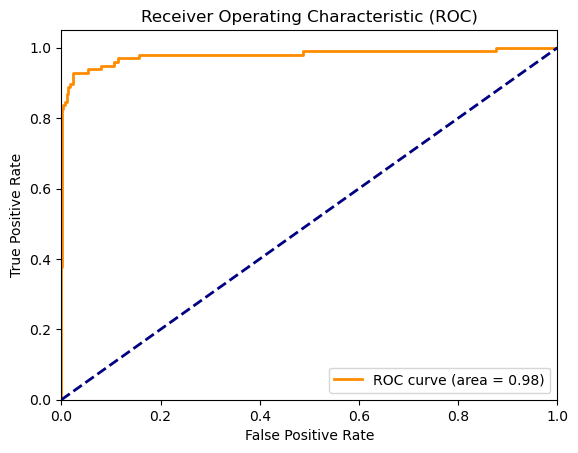

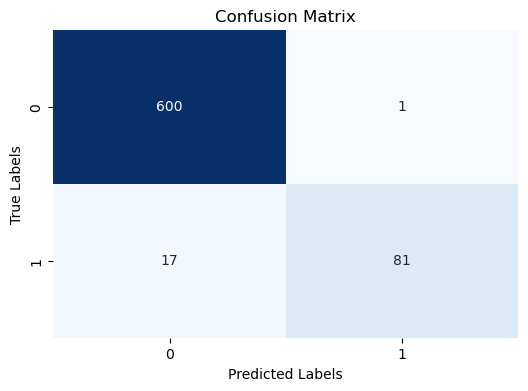

Decision Tree Classifier:
AUROC Score: 0.9164

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       601
           1       0.83      0.87      0.85        98

    accuracy                           0.96       699
   macro avg       0.90      0.92      0.91       699
weighted avg       0.96      0.96      0.96       699



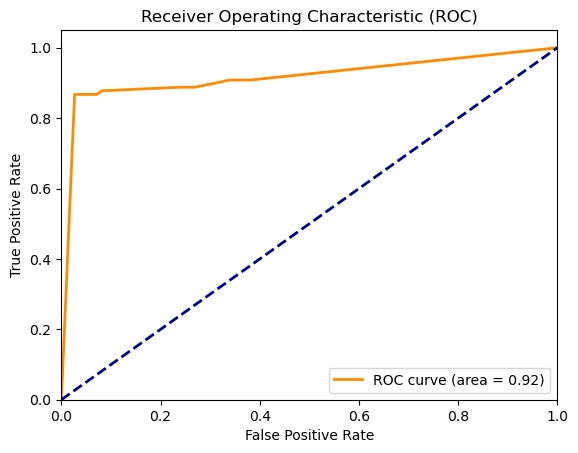

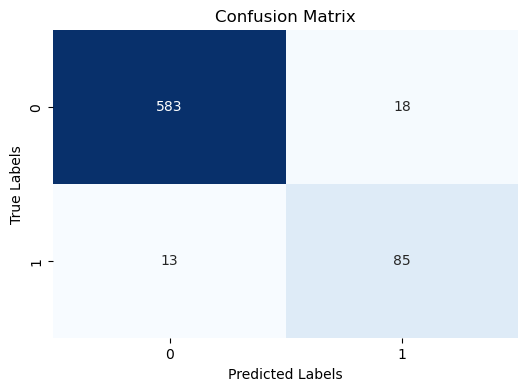

Random Forest Classifier:
AUROC Score: 0.9705

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       601
           1       0.96      0.88      0.91        98

    accuracy                           0.98       699
   macro avg       0.97      0.94      0.95       699
weighted avg       0.98      0.98      0.98       699



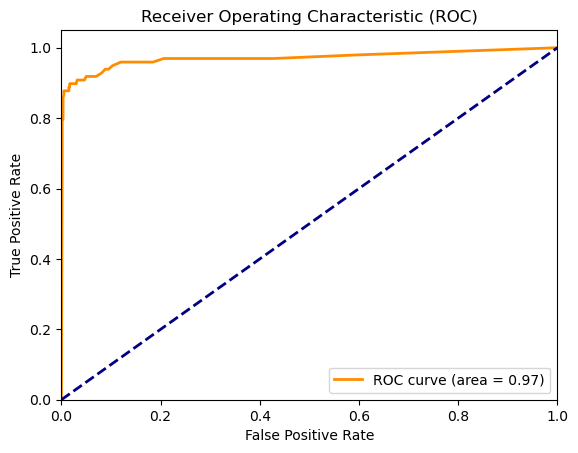

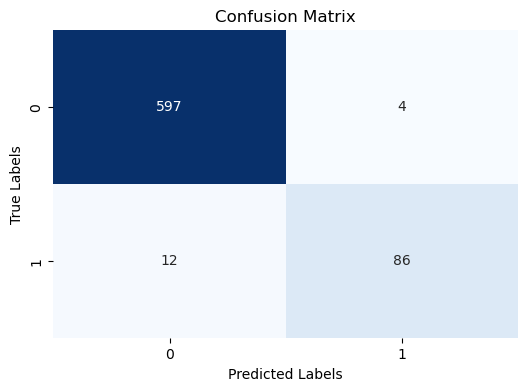

Support Vector Classifier:
AUROC Score: 0.9829

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       601
           1       0.92      0.87      0.89        98

    accuracy                           0.97       699
   macro avg       0.95      0.93      0.94       699
weighted avg       0.97      0.97      0.97       699



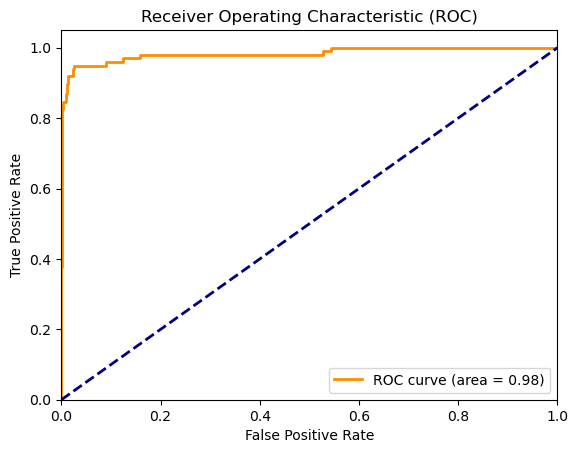

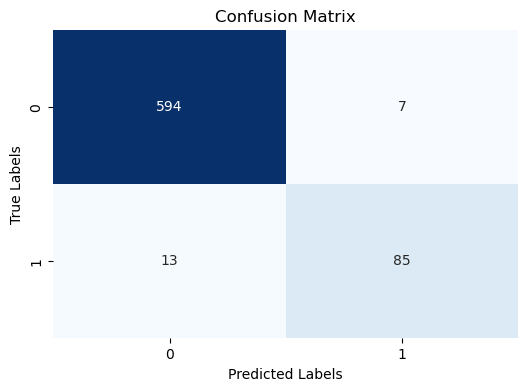

K-Nearest Neighbors Classifier:
AUROC Score: 0.9658

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       601
           1       0.84      0.89      0.87        98

    accuracy                           0.96       699
   macro avg       0.91      0.93      0.92       699
weighted avg       0.96      0.96      0.96       699



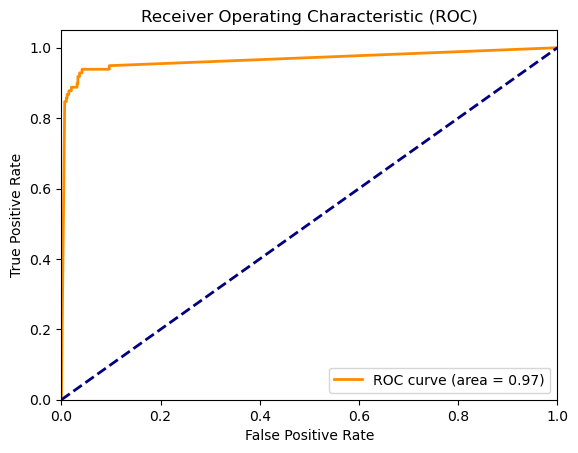

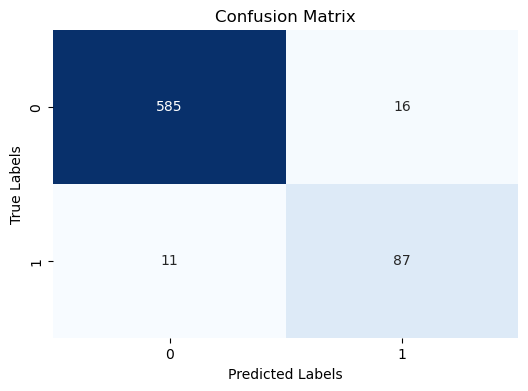

In [28]:
print("Logistic Regression:")
logreg_results = evaluate_model(logreg_model, X_test, y_test)

print("Decision Tree Classifier:")
dt_results = evaluate_model(dt_model, X_test, y_test)

print("Random Forest Classifier:")
rf_results = evaluate_model(rf_model, X_test, y_test)

print("Support Vector Classifier:")
svc_results = evaluate_model(svc_model, X_test, y_test)

print("K-Nearest Neighbors Classifier:")
knn_results = evaluate_model(knn_model, X_test, y_test)

| Model                       | AUROC Score |
|-----------------------------|-------------|
| Random Forest Classifier    | 0.97      |
| K-Nearest Neighbors         | 0.96      |
| Support Vector Classifier   | 0.98      |
| Logistic Regression         | 0.97      |
| Decision Tree Classifier    | 0.91      |


Among the models, the **Random Forest Classifier and K-Nearest Neighbors** achieved the highest AUC-ROC scores, demonstrating excellent performance in detecting fraudulent transactions. 

## Conclusion 
This project demonstrates the importance of addressing class imbalance in fraud detection tasks and highlights the effectiveness of machine learning algorithms in identifying fraudulent credit card transactions. The results obtained from this analysis can serve as a foundation for building a robust and efficient fraud detection system for credit card companies and financial institutions.